<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Semana_05_Practica_05_resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 005

Relacionada a Pandas y expresiones regulares.

# Ejercicio 01

Vamos a trabajar con un dataset del mundial.

Descargar el dataset https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv desde github, levantarlo con pandas y mostrar:

- Mostrar la cantidad de filas
- Mostrar la cantidad de columnas
- Mostrar la cantidad de celdas que posee el dataset
- Mostrar el nombre de las columnas


In [ ]:
from google.colab import drive
import numpy as np
from pandas import DataFrame, read_csv, to_datetime
import pandas as pd

In [ ]:
# montamos drive
drive.mount("/content/drive")
# creamos el nombre de un directorio
dataset_name = "wc_matches"
# nombre de la carpeta
folder_dataset = f"/content/drive/MyDrive/kaggle/datasets/{dataset_name}"
# path completo
file_name = f"/content/drive/MyDrive/kaggle/datasets/{dataset_name}/{dataset_name}.csv"
# creo la carpeta
!mkdir -p {folder_dataset}
# descargo el archivo y lo guardo en el path completo
!wget https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv -O {file_name}
# muestro la primeras líneas del archivo, solo para verificar que se descargó
!head {file_name}

Mounted at /content/drive
--2023-04-21 23:13:44--  https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7905 (7.7K) [text/csv]
Saving to: ‘/content/drive/MyDrive/kaggle/datasets/wc_matches/wc_matches.csv’

/content/drive/MyDr 100%[===================>]   7.72K  --.-KB/s    in 0.001s  

2023-04-21 23:13:44 (14.6 MB/s) - ‘/content/drive/MyDrive/kaggle/datasets/wc_matches/wc_matches.csv’ saved [7905/7905]

date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.0,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.0,2.1
2022-11-21,190

In [ ]:
# leemos el dataset y mostramos la cabecera
df_wc = read_csv(f"{file_name}")
df_wc.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.00,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.00,2.10
1,2022-11-21,1908,FIFA World Cup,England,Iran,85.96,62.17,0.6274,0.1187,0.2539,1.70,0.58,6,2,1.04,1.45,1.50,0.32,5.78,2.10
2,2022-11-21,1908,FIFA World Cup,Senegal,Netherlands,73.84,86.01,0.2235,0.5053,0.2712,0.99,1.63,0,2,0.70,0.68,1.22,1.83,0.00,1.58
3,2022-11-21,1908,FIFA World Cup,USA,Wales,74.83,65.58,0.4489,0.2591,0.2920,1.42,1.01,1,1,0.33,1.78,0.48,0.95,1.05,1.05
4,2022-11-22,1908,FIFA World Cup,Argentina,Saudi Arabia,87.21,56.87,0.7228,0.0807,0.1966,2.11,0.54,1,2,1.63,0.15,2.40,0.53,1.05,2.10


In [ ]:
print("Mostrar la cantidad de filas: ", df_wc.shape[0])
print("Mostrar la cantidad de columnas: ", df_wc.shape[1])
print("Mostrar la cantidad de celdas que posee el dataset: ", df_wc.size)
print("Mostrar el nombre de las columnas: ", df_wc.columns)

Mostrar la cantidad de filas:  64
Mostrar la cantidad de columnas:  20
Mostrar la cantidad de celdas que posee el dataset:  1280
Mostrar el nombre de las columnas:  Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'score1',
       'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')


# Ejercicio 02

Obtener todos los países de forma única que participaron del mundial de futbol. Mostrar los nombre ordenados.

In [ ]:
# agrupo los equipos locales
df_team1 = df_wc.groupby(["team1"])
# agrupo los equipos visitantes
df_team2 = df_wc.groupby(["team2"])
# cargo los equipos locales en un set para hacerlos únicos (ya son únicos por el
# groupby)
teams = set(df_team1.groups.keys())
# hago un update del set
teams.update(df_team2.groups.keys())

print("Los equipos que participaron del mundial son: \n", sorted(teams))


Los equipos que participaron del mundial son: 
 ['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales']


# Ejercicio 03

Obtener la mayor cantidad de goles en un partido que hizo cada selección. Mostrar El nombre del país de la selección y la cantidad de goles.

In [ ]:
# agrupo por team1 y agrego por score1 y obtengo el máximo
df_team1_goals = df_wc.groupby(["team1"]).aggregate("score1").max()
# agrupo por team2 y agrego por score2 y obtengo el máximo
df_team2_goals = df_wc.groupby(["team2"]).aggregate("score2").max()
# concateno ambas Series, voy a obtener índices repetidos (nombre de los países)
series_teams = pd.concat([df_team1_goals, df_team2_goals])
# transformo la Series en un DataFrame con las columnas "teams" y "goals"
df_teams_goals = DataFrame({"teams": series_teams.index, "goals": series_teams.values})
# agrupo por teams y agrego por golas y obtengo el máximo
df_teams_goals = df_teams_goals.groupby(["teams"]).aggregate("goals").max()
df_teams_goals

teams
Argentina       3
Australia       1
Belgium         1
Brazil          4
Cameroon        3
Canada          1
Costa Rica      2
Croatia         4
Denmark         1
Ecuador         2
England         6
France          4
Germany         4
Ghana           3
Iran            2
Japan           2
Mexico          2
Morocco         2
Netherlands     3
Poland          2
Portugal        6
Qatar           1
Saudi Arabia    2
Senegal         3
Serbia          3
South Korea     2
Spain           7
Switzerland     3
Tunisia         1
USA             1
Uruguay         2
Wales           1
Name: goals, dtype: int64

# Ejercicio 04

Graficar el DataFrame del ejercicio 03 como un gráfico de barras.

<Axes: xlabel='teams'>

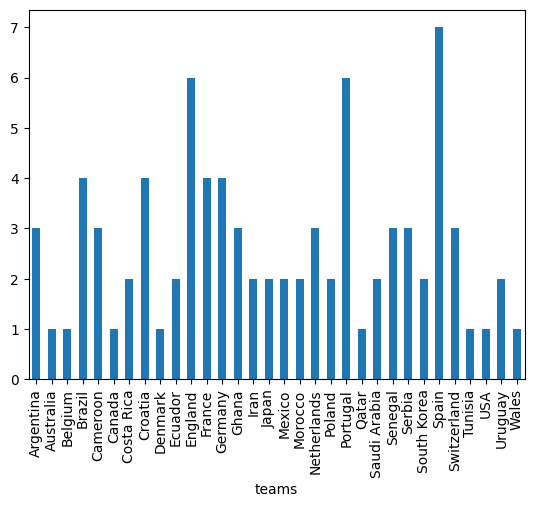

In [ ]:
df_teams_goals.plot(kind="bar")

# Ejercicio 5

Levantar el siguiente dataset de kaggle `stephenknoth/spanish-language-articles` en un DataFrame donde cada fila sea un texto/archivo.

`El directorio tiene varios archivos.`

`Los archivos deberían dar un error al leerlos, ver el tema de encoding.`

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
dataset_name = "spanish-language-articles"
# nombre de la carpeta
folder_dataset = f"/content/drive/MyDrive/kaggle/datasets/{dataset_name}"
!mkdir -p {folder_dataset}

In [ ]:
!kaggle datasets download --unzip -d  stephenknoth/spanish-language-articles -p {folder_dataset}

100% 546k/546k [00:00<00:00, 2.74MB/s]
100% 546k/546k [00:00<00:00, 2.72MB/s]


In [ ]:
!ls {folder_dataset}

00016d5bbec023d12a4cce583506b4a1  7e452079474c90f3f24266bb668e83bb
0139f1fbc519cd762136e35c69fc7de5  7e73e275e9847c1d9ac9a672f69563fc
03ffc8ab7ac583dbc0f5a44fc26de0ac  7f45827438761deb2b5445dc2121b6ea
046db5d3cd77e875e9b5d67829830e8a  7f5e7ebda6941e2b9234f931313ef4cd
05422cc46145456a7772632a7f7a16e0  82be4f15c8dbfd19b8b30a4e878c70de
066eb51676aa0964c77dc8eaf90721f7  82e24d992d3e6bda716e8e0f4f2aff5d
068f39d9679f3335e0f6079db8d21d92  840a55b813f828704aad17348d0e0685
0735819b739e9f3c0b4f4d3f8c7776b0  84f27a8ec0b4e6f691bd041aea8ba3b6
080f218320f615faa913b0e48a4242d6  85032bc67fafa639fd1b50a4a23ff99a
08f20553bac5cc8759ae3ec5dbe0b5e2  865f33c58fc0c8d45bb9159e2b14cc9d
0a1d26291987a378b4325c64b33f7cb7  87e55b6079910cb34a82f07876341657
0b0ee2e0f2d94c0ca30831fa0cf90c7f  8831da6e5c2e135844c53e698a7f6109
0b2dcfd9910e0b8af80f7094d9acd4e8  8939e862c4f15cc954777fcb85458bb9
0bafab82c07439a71caef53d17d83d5c  899d134496fb9d142c53814dbb90e253
0c8087a5e1dd4c3cf00cd68ede58dfcb  8adf33c711a4f9c2120c62a3638d

In [ ]:
import os

lista: list = []
for file_ in os.listdir(folder_dataset):
  with open(folder_dataset+os.sep+file_, encoding='latin1') as r:
    lista.append(r.read())
df_sp = DataFrame(lista,columns=["Texto"])
df_sp.head()

,Texto
0,\nlos derbez la familia mexicana más conocida ...
1,yida arabia saudí ap los saudíes que estén va...
2,\nsegún estadísticas del banco central entre l...
3,\nnayib bukele el joven presidente de el salva...
4,\nquizá y sin quizá la falta de información pe...


# Ejercicio 06

Tomar el DataFrame del ejercicio anterior y crear las siguientes columnas:
- Fecha: debe ir un True si el texto posee una fecha
- Email: debe ir en True si contiene algún email.
- Teléfono: debe ir en True si contiene algún teléfono. Vamos a suponer celulares de argentina.
- Tarjeta de crédito: debe ir en True si contiene algúna tarjeta de crédito.


In [ ]:
import re
# yyyy-mm-dd
patron = re.compile(r"(\d{4}|\d{2})-(0[1-9]|1[0-2]|\d)-(\d|0[1-9]|[12]\d|3[01])$")
fecha_1 = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)
# dd/mm/yyyy
patron = re.compile(r"(\d|0[1-9]|[12]\d|3[01])/(0[1-9]|1[0-2]|\d)/(\d{4}|\d{2})$")
fecha_2 = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)
# mm/dd/yyyy
patron = re.compile(r"(0[1-9]|1[0-2]|\d)/(\d|0[1-9]|[12]\d|3[01])/(\d{4}|\d{2})$")
fecha_3 = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)
# dd-mm-yyyy
patron = re.compile(r"(\d|0[1-9]|[12]\d|3[01])-(0[1-9]|1[0-2]|\d)-(\d{4}|\d{2})$")
fecha_4 = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)
# mm-dd-yyyy
patron = re.compile(r"(0[1-9]|1[0-2]|\d)-(\d|0[1-9]|[12]\d|3[01])-(\d{4}|\d{2})$")
fecha_5 = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)
df_sp["Fecha"] = fecha_1 | fecha_2 | fecha_3 | fecha_4 | fecha_5


patron = re.compile(r"^\w+((\.|-|_)?\w+)*@\w+((\.|-)?\w+)*(\.\w{2,4})+$")
df_sp["Email"] = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)

# +(xxx)-xxx-xxxxxxx
patron = re.compile(r"^[\+]?[(]?[0-9]{3}[)]?[-\s\.]?[0-9]{3}[-\s\.]?[0-9]{5,7}$")
df_sp["Telefono"] = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)

patron = re.compile(r"(^4[0-9]{12}(?:[0-9]{3})?$)|(^(?:5[1-5][0-9]{2}|222[1-9]|22[3-9][0-9]|2[3-6][0-9]{2}|27[01][0-9]|2720)[0-9]{12}$)|(3[47][0-9]{13})|(^3(?:0[0-5]|[68][0-9])[0-9]{11}$)|(^6(?:011|5[0-9]{2})[0-9]{12}$)|(^(?:2131|1800|35\d{3})\d{11}$)")
df_sp["Tarjeta"] = df_sp["Texto"].apply(lambda texto: len(re.findall(patron, texto)) > 0)

# https://ihateregex.io/
df_sp

,Texto,Fecha,Email,Telefono,Tarjeta
0,\nlos derbez la familia mexicana más conocida ...,False,False,False,False
1,yida arabia saudí ap los saudíes que estén va...,False,False,False,False
2,\nsegún estadísticas del banco central entre l...,False,False,False,False
3,\nnayib bukele el joven presidente de el salva...,False,False,False,False
4,\nquizá y sin quizá la falta de información pe...,False,False,False,False
...,...,...,...,...,...
299,por lauren egan nbc newswashington el presid...,False,False,False,False
300,\nendémicas las américas las antillas y la es...,False,False,False,False
301,\nla república dominicana obtuvo cinco plazas ...,False,False,False,False
302,\nsolo quienes tienen problemas con la alterna...,False,False,False,False
